In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests
import time

In [ ]:
base_url = "https://www.allrecipes.com/recipes/"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

find_links = soup.find_all(id="main")
links = []
for container in find_links:
  link = container.find('a', class_="mntl-five-post__featured")
  if link is not None:
    links.append(link.get('href'))

  link_main = container.find_all("a", class_="comp")
  for link in link_main: # link for the main section
      if link is not None:
        links.append(link.get('href'))

# checking
for link in links:
    url = link
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    foods = soup.find(id="mm-myrecipes-bulk-save_1-0")

    if foods:
        find_links = soup.find_all("a", class_="mntl-sc-block-universal-featured-link__link")
        for link in find_links:
            l = link.get('href')
            links.append(l)

In [ ]:
len(links)

196

In [ ]:
recipe = []
for link in links:
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    foods = soup.find(id="mm-myrecipes-bulk-save_1-0")

    # Initialize variables to avoid NameError
    names = np.nan
    rates = np.nan
    count_rating = np.nan
    reviews = 0 # Initialize reviews to 0 as it's a count
    prep_time = np.nan
    cook_time = np.nan
    servings = np.nan
    categories = np.nan

    time_info = soup.find_all("div", class_="mm-recipes-details__item")

    # Name
    find_name = soup.select_one("h1", class_="article-heading")
    if find_name:
        names = find_name.text

    # Rating
 # i add count rating cus rate alone doesnt idicate the whole the food quility cus i can rate my food as 5 star too so count should be helpful
    rating = soup.select_one("#mm-recipes-review-bar__rating_1-0")
    count = soup.select_one("#mm-recipes-review-bar__rating-count_1-0")
    rating_text = rating.get_text(strip=True) if rating else None
    rates = rating_text
    count_text = count.get_text(strip=True) if count else None
    count_rating = count_text

    # Preview
    find_review = soup.find("div", id="mm-recipes-review-bar__comment-count_1-0")
    if find_review:
        if find_review.text == "Be the first to rate & review!":
            reviews = 0 # Actual 0
        elif find_review.text == "Add your rating & review":
            reviews = 1 # There actually 1 review but they added it to "Most helpful positive review" so we review seen as 0 but it actually 1
        else:
            try:
                text = find_review.text.split()
                r = int(text[0])
                reviews = r+1 # For some reason they desided to add "Most helpful positive review" and not include in review section and i thought it techniclly a review so i add 1 more
            except (IndexError, ValueError) as e:
                print("Error parsing reviews: ", e)

    # Time infomation and serving
    for item in time_info:
        label = item.find(class_="mm-recipes-details__label")
        value = item.find(class_="mm-recipes-details__value")
        if label and value:
            if label.text == "Prep Time:":
                prep_time = value.text.strip()
            if label.text == "Cook Time:":
                cook_time = value.text.strip()
            if label.text == "Servings:":
                servings = value.text.strip()
    # Category
    find_category = soup.select("ul", id="mntl-universal-breadcrumbs_1-0")
    for c in find_category:
        cate1 =  c.find("li", id="mntl-breadcrumbs__item_1-0")
        cate2 =  c.find("li", id="mntl-breadcrumbs__item_2-0")
        cate3 =  c.find("li", id="mntl-breadcrumbs__item_3-0")
        cate4 =  c.find("li", id="mntl-breadcrumbs__item_4-0")
        if cate4:
            cate = cate4.select_one("span")
            if cate: categories = cate.text.strip()
        elif cate3:
            cate = cate3.select_one("span")
            if cate: categories = cate.text.strip()
        elif cate2:
            cate = cate2.select_one("span")
            if cate: categories = cate.text.strip()
        elif cate1:
            cate = cate1.select_one("span")
            if cate: categories = cate.text.strip()

    recipe.append({"Name": names, "Rating": rates, "Count": count_rating, "Reviews": reviews, "Prep Time": prep_time, "Cook Time": cook_time, "Servings": servings, "Category": categories})
    print("Link: ", link)
    print("Info", "Name", names, "Rating", rates, "Count", count_rating, "Reviews", reviews, "Prep Time", prep_time, "Cook Time", cook_time, "Servings", servings, "Category", categories)
    time.sleep(1)

Link:  https://www.allrecipes.com/our-top-10-new-recipes-of-2025-11865729
Info Name Our Top 10 New Recipes of 2025 Rating None Count None Reviews 0 Prep Time nan Cook Time nan Servings nan Category Food News and Trends
Link:  https://www.allrecipes.com/our-top-10-new-recipes-of-2025-11865729
Info Name Our Top 10 New Recipes of 2025 Rating None Count None Reviews 0 Prep Time nan Cook Time nan Servings nan Category Food News and Trends
Link:  https://www.allrecipes.com/meet-million-dollar-soup-11884911
Info Name Meet Million Dollar Soup: The 'Deliciously Hearty' Comfort Food I Can't Stop Making Rating None Count None Reviews 0 Prep Time nan Cook Time nan Servings nan Category In the Kitchen
Link:  https://www.allrecipes.com/lazy-winter-recipes-8770171
Info Name 35 Lazy Winter Recipes to Make All Season Long Rating None Count None Reviews 0 Prep Time nan Cook Time nan Servings nan Category Trends
Link:  https://www.allrecipes.com/how-to-make-good-old-fashioned-pancakes-11888805
Info Name 

In [ ]:
df_raw = pd.DataFrame(recipe)
df_raw.to_csv('Allrecipes.csv', index=False)
df_raw

## Upload file using github

In [4]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/Radayou07/Recipe/f6ae4e8507ef913bfc709e6275370ab533b32a00/Allrecipes.csv")
df_raw

,Name,Rating,Count,Reviews,Prep Time,Cook Time,Servings,Category
0,Our Top 10 New Recipes of 2025,NaN,NaN,0,NaN,NaN,NaN,Food News and Trends
1,Our Top 10 New Recipes of 2025,NaN,NaN,0,NaN,NaN,NaN,Food News and Trends
2,Meet Million Dollar Soup: The 'Deliciously Hea...,NaN,NaN,0,NaN,NaN,NaN,In the Kitchen
3,35 Lazy Winter Recipes to Make All Season Long,NaN,NaN,0,NaN,NaN,NaN,Trends
4,This Grandma-Approved Pancake Recipe Has Over ...,NaN,NaN,0,NaN,NaN,NaN,In the Kitchen
...,...,...,...,...,...,...,...,...
191,Oaty Cereal Bars,4.5,(237),194,10 mins,5 mins,16,No-Bake Cookie Recipes
192,White Chocolate Snack Mix,4.8,(219),162,NaN,NaN,40,Party Mix Recipes
193,Grandma Jensen's Nuts and Bolts,4.5,(67),40,10 mins,1 hr 5 mins,24,Party Mix Recipes
194,No Bake Cereal Bars,4.3,(19),10,15 mins,NaN,24,No-Bake Cookie Recipes


# Understanding data

In [5]:
df_raw.head()

,Name,Rating,Count,Reviews,Prep Time,Cook Time,Servings,Category
0,Our Top 10 New Recipes of 2025,NaN,NaN,0,NaN,NaN,NaN,Food News and Trends
1,Our Top 10 New Recipes of 2025,NaN,NaN,0,NaN,NaN,NaN,Food News and Trends
2,Meet Million Dollar Soup: The 'Deliciously Hea...,NaN,NaN,0,NaN,NaN,NaN,In the Kitchen
3,35 Lazy Winter Recipes to Make All Season Long,NaN,NaN,0,NaN,NaN,NaN,Trends
4,This Grandma-Approved Pancake Recipe Has Over ...,NaN,NaN,0,NaN,NaN,NaN,In the Kitchen


In [6]:
df = df_raw.copy()

In [7]:
df.columns

Index(['Name', 'Rating', 'Count', 'Reviews', 'Prep Time', 'Cook Time',
       'Servings', 'Category'],
      dtype='object')

In [8]:
df.dtypes

Name          object
Rating       float64
Count         object
Reviews        int64
Prep Time     object
Cook Time     object
Servings      object
Category      object
dtype: object

Format to correct type to make analysis easier

In [9]:
df['Count'] = df['Count'].astype(str).str.replace('(', '', regex=False)
df['Count'] = df['Count'].str.replace(')', '', regex=False)
df['Count'] = pd.to_numeric(df['Count'], errors='coerce').astype('Int64')

df['Rating'] = df['Rating'].astype(str).str.split(' ').str[0]
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df['Servings'] = df['Servings'].astype(str).str.split(' ').str[0]
df['Servings'] = pd.to_numeric(df['Servings'], errors='coerce')

def handle_time(x):
    if pd.isna(x):
        return None
    parts = str(x).split()
    if len(parts) == 2:
        if parts[1].startswith("hr"):
            return int(parts[0]) * 60
        else:
            return int(parts[0])
    elif len(parts) == 4:
        hours = int(parts[0])
        minutes = int(parts[2])
        return hours * 60 + minutes
    else:
        return None

df['Prep Time'] = df['Prep Time'].apply(handle_time).astype('Int64')
df['Cook Time'] = df['Cook Time'].apply(handle_time).astype('Int64')

# Cleaing

In [10]:
df.isnull().sum()

Name          0
Rating       54
Count        77
Reviews       0
Prep Time    25
Cook Time    45
Servings     21
Category      1
dtype: int64

We remove serving becuase if it doesnt have serving which mean it not food but menu kinda thing

In [11]:
print("Before remove servings and dup: ", df.shape)
df = df.dropna(subset=['Servings'])
df = df.drop_duplicates()
df = df.dropna(subset=['Category'])
print("After remove servings and dup: ", df.shape)

Before remove servings and dup:  (196, 8)
After remove servings and dup:  (165, 8)


We fill everything else with median because we have only 175 rows we couldnt affort to lose more and median seem fit well

In [12]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Count'] = df['Count'].fillna(df['Count'].median())

df['Prep Time'] = df['Prep Time'].fillna(df['Prep Time'].median())
df['Cook Time'] = df['Cook Time'].fillna(df['Cook Time'].median())

In [13]:
df.to_csv('Recipes-data.csv', index=False)

# EDA

In [14]:
sns.set_style("darkgrid")

In [15]:
df.describe()

,Rating,Count,Reviews,Prep Time,Cook Time,Servings
count,165.000000,165.0,165.000000,165.0,165.0,165.000000
mean,4.634545,72.278788,75.884848,16.575758,58.218182,11.569697
std,0.300742,130.598836,173.494127,21.340775,95.201716,11.794596
min,3.000000,1.0,0.000000,5.0,5.0,1.000000
25%,4.600000,12.0,0.000000,10.0,20.0,4.000000
50%,4.700000,22.0,5.000000,15.0,30.0,8.000000
75%,4.800000,66.0,55.000000,20.0,45.0,12.000000
max,5.000000,906.0,943.000000,250.0,720.0,88.000000


In [16]:
a = df['Category'].unique()
print(a)
print("=====")
print("There're ", len(a), " categories")

['Breakfast Casserole Recipes' 'Chicken' 'Slider Recipes' 'Beef'
 'Pork Chop Recipes' 'Soup Recipes' 'Sweet Potatoes' 'Omelet Recipes'
 'One-Pot Meal Recipes' 'Cabbage Soup Recipes' 'Celery Root'
 'Beans and Peas' 'Vegetable Soup Recipes' 'Garlic Bread Recipes'
 'Ground Beef' 'Lunar New Year' 'Party Mix Recipes' 'Tiramisu Recipes'
 'Stuffing' 'Potato' 'Rice Side Dish Recipes' 'Chocolate Cookie Recipes'
 'Pastries' 'Black Beans' 'Potato Casserole' 'Hot Cheese Dip Recipes'
 'Shortbread Cookie Recipes' 'Bar Cookie Recipes' 'Pasta' 'Peanut Recipes'
 'Bowls' 'Lasagna Recipes' 'English' 'Chicken Breast' 'Meat and Poultry'
 'Quick and Easy Main Dishes' 'Chicken Pot Pie Recipes' 'Main Dishes'
 'Ice Cream' 'Chicken Noodle Soup Recipes' 'Oatmeal Recipes'
 'Ground Beef Recipes' 'Chicken Piccata Recipes' 'Chicken Soup Recipes'
 'Summer Desserts' 'Spaghetti' 'Dumpling Recipes' 'Rice' 'Noodles'
 'Brussels Sprouts' 'Vegetable' 'Corned Beef Recipes'
 'White Chili Recipes' 'Eggs' 'Cornbread Recipes' 'N

### Top 10 category

<Axes: xlabel='count', ylabel='Category'>

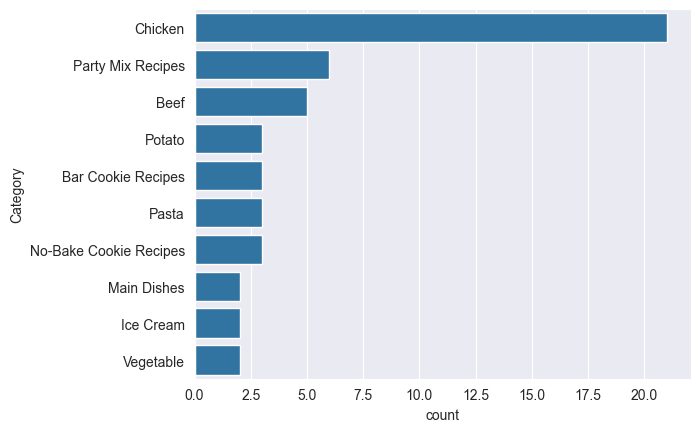

In [17]:
sns.countplot(df['Category'], order=df['Category'].value_counts().index[:10])

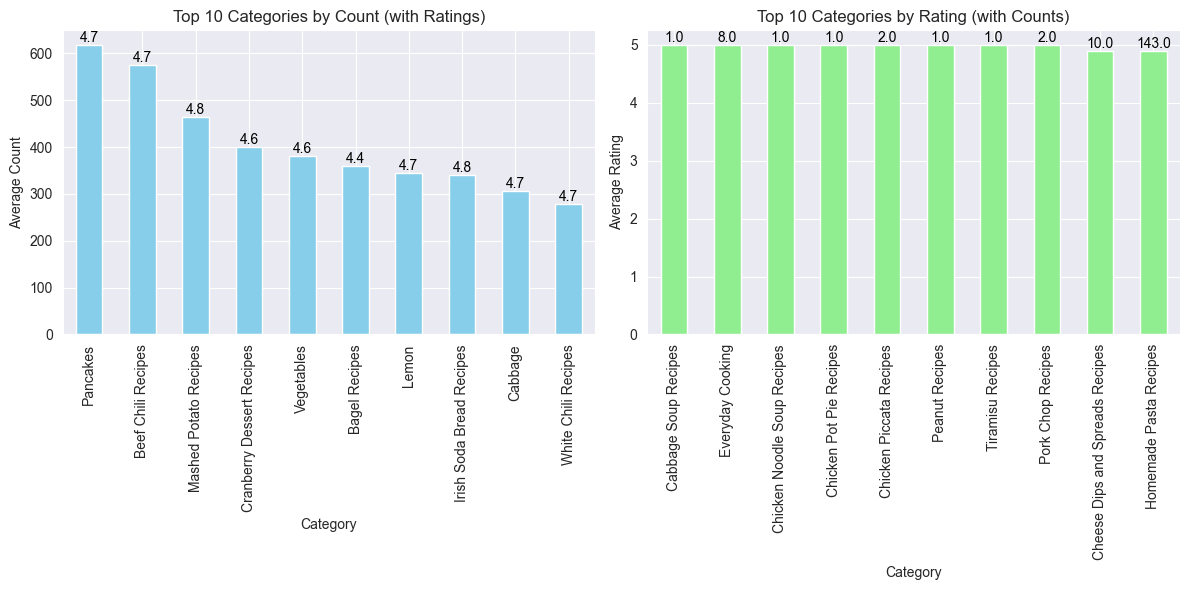

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.flatten()

# Left chart: Top 10 by Count
grouped_count = df.groupby('Category').agg({
    'Count': 'mean',
    'Rating': 'mean'
}).sort_values('Count', ascending=False).head(10)

grouped_count['Count'].plot(kind='bar', ax=ax[0], color='skyblue')
for i, p in enumerate(ax[0].patches):
    rating_value = round(grouped_count['Rating'].iloc[i], 2)
    ax[0].annotate(
        str(rating_value),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )
ax[0].set_ylabel("Average Count")
ax[0].set_title("Top 10 Categories by Count (with Ratings)")

# Right chart: Top 10 by Rating
grouped_rate = df.groupby('Category').agg({
    'Rating': 'mean',
    'Count': 'mean'
}).sort_values('Rating', ascending=False).head(10)

grouped_rate['Rating'].plot(kind='bar', ax=ax[1], color='lightgreen')
for i, p in enumerate(ax[1].patches):
    count_value = round(grouped_rate['Count'].iloc[i], 2)
    ax[1].annotate(
        str(count_value),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )
ax[1].set_ylabel("Average Rating")
ax[1].set_title("Top 10 Categories by Rating (with Counts)")

plt.tight_layout()
plt.show()

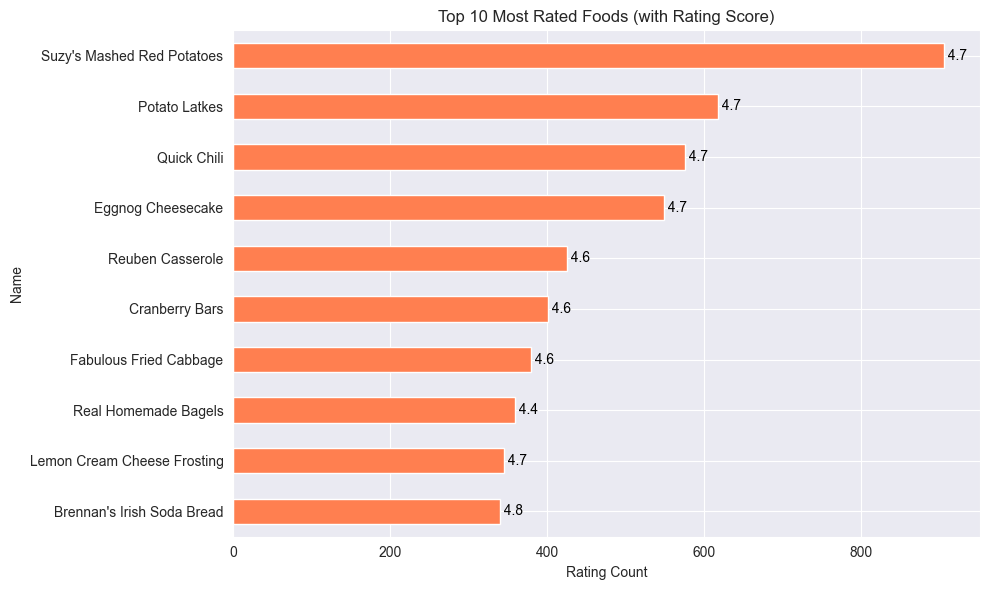

In [28]:
import matplotlib.pyplot as plt

# Group by food name
grouped_name = df.groupby('Name').agg({
    'Count': 'mean',
    'Rating': 'mean'  
}).sort_values('Count', ascending=False).head(10)

ax = grouped_name['Count'].plot(kind='barh', figsize=(10, 6), color='coral')

for i, p in enumerate(ax.patches):
    rating_value = round(grouped_name['Rating'].iloc[i], 2)
    ax.annotate(
        f" {rating_value}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.xlabel("Rating Count")
plt.title("Top 10 Most Rated Foods (with Rating Score)")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()